# Exploração de Dados do Fundo Nacional de Saúde - Novo PAC

Com base nos dados de projetos selecionados para financiamento do Novo PAC, área de saúde, apresento algumas ideias de análises e explorações de dados que podem ser feitas para o Brasil, suas regiões, seus estados e municípios.

In [81]:
#Primeiro vamos deixar separados os pacotes que iremos utilizar ao longo da analise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Vamos iniciar fazendo o carregamento da planilha com os dados de financiamento dos projetos (selecionados e não selecionados)
Aqui a planilha está no meu diretório, então, após donwload da mesma consigo usa-lá diretamente.

In [16]:
# Leitura da planilha 'financiamento_saude.xlsx'
fns = pd.read_excel('FNS.xlsx')

# Caso a planilha tivesse algumas linhas acima do nome das colunas, poderia ser adicionado na leitura o comando
# skiprows= número de linhas que desejo pular na leitura

# Análise Exploratória Inicial

Com o método info() conseguimos facilmente saber o nome de cada coluna, o número de linhas por coluna, o tipo de dado de cada uma dessas colunas e a quantidade de observação que temos. Por padrão ele tenta identificar o tipo de dado como int, float, datetime, ou object caso ele não consiga identificar o tipo exato. No final podemos observar a quantidade de memória utilizada para ler o arquivo.

In [17]:
fns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SECRETARIA                                  6510 non-null   object 
 1   Nº Proposta                                 6510 non-null   object 
 2   UF                                          6510 non-null   object 
 3   Municípios que receberão o investimento     6510 non-null   object 
 4   Modalidade                                  6510 non-null   object 
 5   Ente federativo proponente                  6510 non-null   object 
 6   CNPJ do Proponente                          6510 non-null   int64  
 7   Resultado                                   6510 non-null   object 
 8   Porte / Tipo                                6510 non-null   object 
 9   Valor Investimento                          6510 non-null   float64
 10  Quantidade d

In [9]:
#Só observando as informações, temos 6510 linhas e 17 colunas, ou podemos usar o comando:
print(fns.shape)

(6510, 17)


In [30]:
# Como comando inicial podemos observar algumas estatísticas descritivas das colunas com valores númericos
print(fns.describe())

       CNPJ do Proponente  Investimento
count        6.510000e+03  6.510000e+03
mean         2.619810e+13  2.802497e+06
std          2.725268e+13  1.099963e+07
min          1.602000e+09  3.240000e+05
25%          7.438257e+12  5.136250e+05
50%          1.386689e+13  1.816495e+06
75%          4.451846e+13  2.143000e+06
max          9.866137e+13  1.530000e+08


In [8]:
#Usamos head para vê as 5 primeiras linhas dos dados, só para observar como são os dados.
print(fns.head())

  SECRETARIA       Nº Proposta  UF Municípios que receberão o investimento  \
0       SAPS  36000000004/2023  PR                                   Fenix   
1       SAPS  36000000023/2023  PE                         Santa Terezinha   
2       SAPS  36000000028/2023  SP                            Taquaritinga   
3       SAES  36000000031/2023  BA                                 Coaraci   
4       SAPS  36000000042/2023  BA                                   Mairi   

             Modalidade    Ente federativo proponente  CNPJ do Proponente  \
0                   UOM            Município De Fenix      76950021000130   
1                   UOM  Município De Santa Terezinha      11358140000152   
2                   UOM     Município De Taquaritinga      72130818000130   
3  AMBULÂNCIAS SAMU 192          Municipio De Coaraci      14147474000175   
4                   UOM            Município De Mairi      14212872000128   

                      Resultado Porte / Tipo  Valor Investimento  \


# Limpeza e Pré-processamento

Os nomes das colunas estão com espaço, o que pode ser ruim no futuro para o python conseguir fazer a leitura, vamos mudar o nome das colunas, apenas das que vamos usar

In [19]:
novos_nomes = {'Municípios que receberão o investimento': 'Muni', 'Valor Investimento':'Investimento',
              'Porte / Tipo':'Tipo'}
fns.rename(columns=novos_nomes, inplace=True)

In [20]:
print(fns.head())

  SECRETARIA       Nº Proposta  UF             Muni            Modalidade  \
0       SAPS  36000000004/2023  PR            Fenix                   UOM   
1       SAPS  36000000023/2023  PE  Santa Terezinha                   UOM   
2       SAPS  36000000028/2023  SP     Taquaritinga                   UOM   
3       SAES  36000000031/2023  BA          Coaraci  AMBULÂNCIAS SAMU 192   
4       SAPS  36000000042/2023  BA            Mairi                   UOM   

     Ente federativo proponente  CNPJ do Proponente  \
0            Município De Fenix      76950021000130   
1  Município De Santa Terezinha      11358140000152   
2     Município De Taquaritinga      72130818000130   
3          Municipio De Coaraci      14147474000175   
4            Município De Mairi      14212872000128   

                      Resultado Tipo  Investimento Quantidade de ambulâncias*  \
0  Habilitadas não selecionadas    -      513625.0              não se aplica   
1  Habilitadas não selecionadas    -      51

Vamos criar um subconjunto dos dados do fns para ficar melhor de trabalhar. Vamos usar: UF, Muni, Modalidade, Resultado, Tipo e Investimento.

In [21]:
#Farei como copia, pois qualquer coisa temos nossa planilha original
FNS = fns.copy()

In [23]:
FNS = fns[["UF","Muni","Modalidade","Resultado", "Tipo", "Investimento"]]

In [24]:
print(FNS.head())

   UF             Muni            Modalidade                     Resultado  \
0  PR            Fenix                   UOM  Habilitadas não selecionadas   
1  PE  Santa Terezinha                   UOM  Habilitadas não selecionadas   
2  SP     Taquaritinga                   UOM  Habilitadas não selecionadas   
3  BA          Coaraci  AMBULÂNCIAS SAMU 192  Habilitadas não selecionadas   
4  BA            Mairi                   UOM  Habilitadas não selecionadas   

  Tipo  Investimento  
0    -      513625.0  
1    -      513625.0  
2    -      513625.0  
3  USB      324000.0  
4    -      513625.0  


# Análise Descritiva Detalhada - Brasil

In [35]:
#Primeiro vamos filtrar apenas os projetos selecionados
FNS_selecionados = FNS[FNS["Resultado"]== "Habilitadas selecionadas"]

In [36]:
print(FNS_selecionados)

      UF               Muni            Modalidade                 Resultado  \
3748  BA   Serra Do Ramalho                   UOM  Habilitadas selecionadas   
3749  MG  Sao Joao Da Ponte                   UBS  Habilitadas selecionadas   
3750  PE    Santa Terezinha  AMBULÂNCIAS SAMU 192  Habilitadas selecionadas   
3751  BA      Nova Redencao                   UOM  Habilitadas selecionadas   
3752  PE    Santa Terezinha                   UBS  Habilitadas selecionadas   
...   ..                ...                   ...                       ...   
6505  PA        Terra Santa  AMBULÂNCIAS SAMU 192  Habilitadas selecionadas   
6506  PR       Sertanopolis                   UBS  Habilitadas selecionadas   
6507  PA             Aveiro  AMBULÂNCIAS SAMU 192  Habilitadas selecionadas   
6508  PA             Obidos  AMBULÂNCIAS SAMU 192  Habilitadas selecionadas   
6509  CE            Mombaca                   UBS  Habilitadas selecionadas   

     Tipo  Investimento  
3748    -     513625.00  

In [37]:
#Vamos contar a quantidade de projetos que foram selecionadas contando as observações da coluna "Resultado"
print(FNS_selecionados['Resultado'].value_counts())

Habilitadas selecionadas    2762
Name: Resultado, dtype: int64


In [39]:
#O número de municípios que serão contemplados
print(FNS_selecionados['Muni'].value_counts())

Brasilia             11
Cascavel              8
Rondonopolis          7
Bonito                6
Santarem              6
                     ..
Irai De Minas         1
Eldorado Do Sul       1
Itu                   1
Nova Bandeirantes     1
Obidos                1
Name: Muni, Length: 1869, dtype: int64


In [40]:
#Média dos Investimentos no Brasil
np.mean(FNS_selecionados["Investimento"])

4183045.2371722665

In [41]:
media_invest = np.mean(FNS_selecionados["Investimento"])
print(f"A média de Investimentos por projeto habilitade e seleionado é: {media_invest:,.2f}")

A média de Investimentos por projeto habilitade e seleionado é: 4,183,045.24


In [43]:
print(FNS_selecionados['Modalidade'].value_counts())

UBS                     1800
UOM                      400
AMBULÂNCIAS SAMU 192     237
CAPS                     150
POLICLÍNICA               55
MATERNIDADE               36
CPN                       30
OFICINA ORTOPÉDICA        20
CER                       20
CRU SAMU 192              14
Name: Modalidade, dtype: int64


In [45]:
contagem = FNS_selecionados['Modalidade'].value_counts()
# Calcule as probabilidades dividindo as contagens pelo total de dados
probabilidades = contagem / FNS_selecionados['Modalidade'].count()

In [48]:
print(probabilidades)

UBS                     0.651702
UOM                     0.144823
AMBULÂNCIAS SAMU 192    0.085807
CAPS                    0.054308
POLICLÍNICA             0.019913
MATERNIDADE             0.013034
CPN                     0.010862
OFICINA ORTOPÉDICA      0.007241
CER                     0.007241
CRU SAMU 192            0.005069
Name: Modalidade, dtype: float64


Podemos observar que a maior parte dos investimentos é para a modalidade UBS, representando cerca de 65%

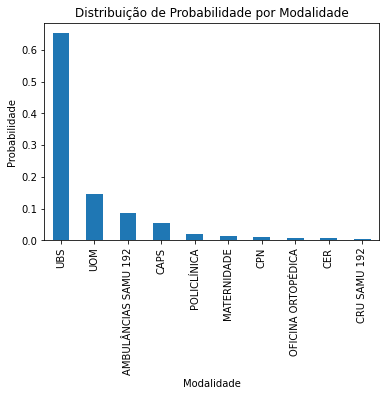

In [46]:
# Utilize o método `plot.bar()` para criar um gráfico de barras
probabilidades.plot.bar()

# Personalize o gráfico (opcional):
plt.xlabel('Modalidade')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Probabilidade por Modalidade')
plt.show()

# Análise Descritiva Detalhada - Região

Primeiramente vamos adicionar uma coluna com as regiões, já que não temos nos dados, para isso vamos mapear a coluna UF, relacionando estado com sua região. Lembrar de colocar na planilha original, depois tiramos um subconjunto

In [50]:
mapeamento_estado_regiao = {
    "AC": "Norte",
    "AL": "Nordeste",
    "AP": "Norte",
    "AM": "Norte",
    "BA": "Nordeste",
    "CE": "Nordeste",
    "DF": "Centro-Oeste",
    "ES": "Sudeste",
    "GO": "Centro-Oeste",
    "MA": "Nordeste",
    "MT": "Centro-Oeste",
    "MS": "Centro-Oeste",
    "MG": "Sudeste",
    "PA": "Norte",
    "PB": "Nordeste",
    "PR": "Sul",
    "PE": "Nordeste",
    "PI": "Nordeste",
    "RJ": "Sudeste",
    "RN": "Nordeste",
    "RS": "Sul",
    "RO": "Norte",
    "RR": "Norte",
    "SC": "Sul",
    "SP": "Sudeste",
    "SE": "Nordeste",
    "TO": "Norte"
}

In [55]:
fns["Região"] = fns["UF"].map(mapeamento_estado_regiao)

In [56]:
print(fns.head())

  SECRETARIA       Nº Proposta  UF             Muni            Modalidade  \
0       SAPS  36000000004/2023  PR            Fenix                   UOM   
1       SAPS  36000000023/2023  PE  Santa Terezinha                   UOM   
2       SAPS  36000000028/2023  SP     Taquaritinga                   UOM   
3       SAES  36000000031/2023  BA          Coaraci  AMBULÂNCIAS SAMU 192   
4       SAPS  36000000042/2023  BA            Mairi                   UOM   

     Ente federativo proponente  CNPJ do Proponente  \
0            Município De Fenix      76950021000130   
1  Município De Santa Terezinha      11358140000152   
2     Município De Taquaritinga      72130818000130   
3          Municipio De Coaraci      14147474000175   
4            Município De Mairi      14212872000128   

                      Resultado Tipo  Investimento Quantidade de ambulâncias*  \
0  Habilitadas não selecionadas    -      513625.0              não se aplica   
1  Habilitadas não selecionadas    -      51

In [57]:
FNS_Reg = fns.copy()
FNS_Reg = fns[["UF","Muni","Modalidade","Resultado", "Tipo", "Investimento", "Região"]]
print(FNS_Reg.head())

   UF             Muni            Modalidade                     Resultado  \
0  PR            Fenix                   UOM  Habilitadas não selecionadas   
1  PE  Santa Terezinha                   UOM  Habilitadas não selecionadas   
2  SP     Taquaritinga                   UOM  Habilitadas não selecionadas   
3  BA          Coaraci  AMBULÂNCIAS SAMU 192  Habilitadas não selecionadas   
4  BA            Mairi                   UOM  Habilitadas não selecionadas   

  Tipo  Investimento    Região  
0    -      513625.0       Sul  
1    -      513625.0  Nordeste  
2    -      513625.0   Sudeste  
3  USB      324000.0  Nordeste  
4    -      513625.0  Nordeste  


In [72]:
# Vamos começar nossa analise com algumas estatísticas básicas por região para podermos comparar
investimento_por_regiao = FNS_Reg.groupby('Região')['Investimento'].sum()
investimento_por_regiao = investimento_por_regiao.apply(lambda valor: f"{valor:,.2f}")
print(investimento_por_regiao)

Região
Centro-Oeste    2,146,333,372.71
Nordeste        6,243,626,333.61
Norte           2,227,526,264.40
Sudeste         4,987,293,588.20
Sul             2,639,474,742.23
Name: Investimento, dtype: object


In [73]:
investimentomed_por_regiao = FNS_Reg.groupby('Região')['Investimento'].mean()
investimentomed_por_regiao = investimentomed_por_regiao.apply(lambda valor: f"{valor:,.2f}")
print(investimentomed_por_regiao)

Região
Centro-Oeste    3,434,133.40
Nordeste        2,446,562.04
Norte           3,627,892.94
Sudeste         2,756,933.99
Sul             2,900,521.69
Name: Investimento, dtype: object


In [69]:
quantidade_municipios_por_regiao = FNS_Reg['Muni'].value_counts()
print(quantidade_municipios_por_regiao)

Recife            49
Brasilia          27
Porto Alegre      25
Maceio            24
Natal             23
                  ..
Curral De Cima     1
Japoata            1
Augustinopolis     1
Frei Gaspar        1
Obidos             1
Name: Muni, Length: 3129, dtype: int64


In [70]:
quantidade_municipios_por_regiao = FNS_Reg.groupby('Região')['Muni'].nunique()
print(quantidade_municipios_por_regiao)

Região
Centro-Oeste     285
Nordeste        1267
Norte            272
Sudeste          889
Sul              477
Name: Muni, dtype: int64


In [77]:
modalidade_por_regiao = FNS_Reg.groupby('Região')['Modalidade'].value_counts()
print(modalidade_por_regiao)

Região        Modalidade          
Centro-Oeste  UBS                      275
              UOM                      227
              CAPS                      53
              AMBULÂNCIAS SAMU 192      40
              POLICLÍNICA               10
              MATERNIDADE                7
              CPN                        5
              CER                        4
              CRU SAMU 192               2
              OFICINA ORTOPÉDICA         2
Nordeste      UOM                     1168
              UBS                      916
              CAPS                     223
              AMBULÂNCIAS SAMU 192     139
              CER                       29
              POLICLÍNICA               25
              CPN                       24
              MATERNIDADE               17
              OFICINA ORTOPÉDICA         7
              CRU SAMU 192               4
Norte         UBS                      243
              UOM                      195
              CAPS 

Pelos dados podemos observar que a região Nordeste é a que mais vai receber UOM - Unidade Odontologica Movél e UBS - Unidade Básica de Saúde 

In [84]:
tabela_contingencia = pd.crosstab(FNS_Reg['Região'], FNS_Reg['Modalidade'])
print(tabela_contingencia)

Modalidade    AMBULÂNCIAS SAMU 192  CAPS  CER  CPN  CRU SAMU 192  MATERNIDADE  \
Região                                                                          
Centro-Oeste                    40    53    4    5             2            7   
Nordeste                       139   223   29   24             4           17   
Norte                           37    95    4   11             4            7   
Sudeste                        106   219   23    7             3            6   
Sul                             72   114    8    2             1            3   

Modalidade    OFICINA ORTOPÉDICA  POLICLÍNICA  UBS   UOM  
Região                                                    
Centro-Oeste                   2           10  275   227  
Nordeste                       7           25  916  1168  
Norte                          6           12  243   195  
Sudeste                        4           24  853   564  
Sul                            1           17  435   257  


In [86]:
chi2, pval, dof, expected = chi2_contingency(tabela_contingencia)

# Impressão dos resultados
print("Valor de Qui-Quadrado:", chi2)
print("Valor p:", pval)
print("Graus de Liberdade:", dof)
print("Frequências Esperadas:")
print(expected)

Valor de Qui-Quadrado: 226.63247918387606
Valor p: 1.694715153772358e-29
Graus de Liberdade: 36
Frequências Esperadas:
[[  37.82642089   67.58832565    6.52841782    4.70430108    1.34408602
     3.84024578    1.92012289    8.44854071  261.32872504  231.47081413]
 [ 154.45284178  275.97665131   26.65683564   19.20860215    5.48817204
    15.68049155    7.84024578   34.49708141 1067.05745008  945.14162826]
 [  37.16067588   66.39877112    6.41351767    4.62150538    1.32043011
     3.77265745    1.88632873    8.29984639  256.72933948  227.3969278 ]
 [ 109.48479263  195.62764977   18.89585253   13.61612903    3.89032258
    11.11520737    5.55760369   24.45345622  756.38986175  669.96912442]
 [  55.07526882   98.40860215    9.50537634    6.84946237    1.95698925
     5.59139785    2.79569892   12.30107527  380.49462366  337.02150538]]


Valor de Qui-Quadrado (chi2): Quanto maior o valor de chi2, mais forte é a evidência contra a independência das variáveis.

Valor p (pval): Um valor p baixo (geralmente menor que 0,05) indica que há evidências suficientes para rejeitar a hipótese nula de independência e concluir que as variáveis estão associadas.

Podemos rejeitar a hipótese nula e concluir que existe uma associação significativa entre a região e a modalidade de investimento em saúde.

